In [ ]:
import pandas as pd
import datetime

from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from keras.datasets import imdb
from keras.layers import Dense, Dropout, Activation, SimpleRNN, LSTM, GRU, CuDNNLSTM, Embedding, Bidirectional
from tensorflow.keras.optimizers import Adam

In [ ]:
num_words=10000
(train_data,train_labels),(test_data,test_labels) = tf.keras.datasets. imdb.load_data(num_words=num_words)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print(train_data[0])
num_atr = len(train_data[0])
print(train_data.shape)
print(len(test_data))
print(train_labels.shape)
print(num_atr)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
(25000,)
25000
(25000,)
218


In [ ]:
# number or words
word_index = imdb.get_word_index()
print(type(word_index))
print("length of word_index: ",len(word_index))


1654784/1641221 [==============================] - 0s 0us/step
<class 'dict'>
length of word_index:  88584


In [ ]:
def decode_comments(index,dataset):
    reverse_index = dict([(value,key) for (key,value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i-3, "") for i in dataset[index]])
    return decode_review

decoded_comment = decode_comments(0, train_data)
print(decoded_comment)

 this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the 

In [ ]:
print("train classes: ",np.unique(train_labels))
print("test classes: ",np.unique(test_labels))

train classes:  [0 1]
test classes:  [0 1]


In [ ]:
review_len_train = []
review_len_test = []
for i,j in zip(train_data,test_data):
    review_len_train.append(len(i))
    review_len_test.append(len(j))

min:  11 max:  2494
min:  7 max:  2315


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


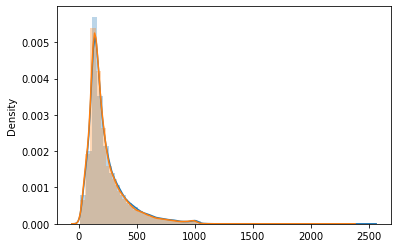

In [ ]:
print("min: ", min(review_len_train), "max: ", max(review_len_train))
print("min: ", min(review_len_test), "max: ", max(review_len_test))
sns.distplot(review_len_train,hist_kws={"alpha":0.3});
sns.distplot(review_len_test,hist_kws={"alpha":0.3});

In [ ]:
maxlen=100
from keras.preprocessing.sequence import pad_sequences 
X_train = pad_sequences(train_data, maxlen=maxlen)
X_test = pad_sequences(test_data, maxlen=maxlen)

In [ ]:
def plot_loss(history):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_figheight(8)
  fig.set_figwidth(15)
  fig.suptitle('accuracy and loss of model')
  ax1.plot(history.history["loss"],label="loss")
  ax1.plot(history.history["val_loss"],label="val_loss")
  ax2.plot(history.history["accuracy"],label="train")
  ax2.plot(history.history["val_accuracy"],label="validation")
  plt.legend()

In [ ]:
def scheduler(epoch, lr):
  if epoch < 2:
    return lr
  else:
    return lr * tf.math.exp(-0.5)
checkpoint_filepath = '/tmp/checkpoint'
callback1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
callback2 = tf.keras.callbacks.LearningRateScheduler(scheduler)
callback3 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model1 = Sequential()
model1.add(Embedding(num_words,128,input_length =len(X_train[0])))
model1.add(SimpleRNN(64,input_shape = (num_words,maxlen), return_sequences=False,activation="relu"))
model1.add(Dense(1)) 
model1.add(Activation("sigmoid")) 

print(model1.summary())
model1.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 200, 128)          2560000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                12352     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 2,572,417
Trainable params: 2,572,417
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history1 = model1.fit(X_train,train_labels, validation_split = 0.1 ,epochs =20 ,batch_size=128, callbacks=[callback1, callback2, callback3])

Epoch 1/20
176/176 [==============================] - 34s 189ms/step - loss: 0.6275 - accuracy: 0.6315 - val_loss: 0.5971 - val_accuracy: 0.8076 - lr: 0.0010
Epoch 2/20
176/176 [==============================] - 32s 181ms/step - loss: 0.3770 - accuracy: 0.8340 - val_loss: 0.3948 - val_accuracy: 0.8200 - lr: 0.0010
Epoch 3/20
176/176 [==============================] - 32s 179ms/step - loss: 0.2148 - accuracy: 0.9158 - val_loss: 0.3850 - val_accuracy: 0.8280 - lr: 6.0653e-04
Epoch 4/20
176/176 [==============================] - 31s 178ms/step - loss: 0.1350 - accuracy: 0.9509 - val_loss: 0.3361 - val_accuracy: 0.8704 - lr: 3.6788e-04
Epoch 5/20
176/176 [==============================] - 32s 182ms/step - loss: 0.0918 - accuracy: 0.9680 - val_loss: 0.3783 - val_accuracy: 0.8652 - lr: 2.2313e-04
Epoch 6/20
176/176 [==============================] - 31s 176ms/step - loss: 0.0683 - accuracy: 0.9770 - val_loss: 0.3652 - val_accuracy: 0.8768 - lr: 1.3534e-04
Epoch 7/20
176/176 [================

In [ ]:
score = model1.evaluate(X_test,test_labels)

782/782 [==============================] - 13s 16ms/step - loss: 0.4221 - accuracy: 0.8624


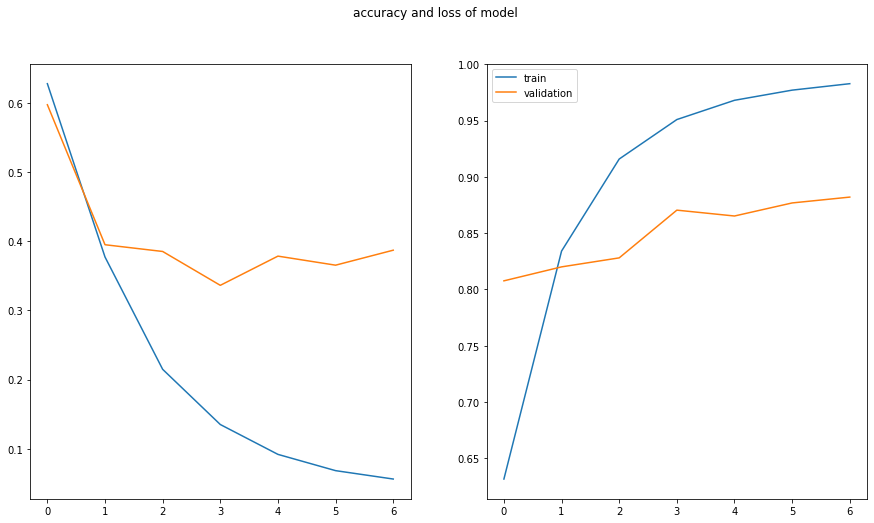

In [ ]:
plot_loss(history1)

# **Q4**(GRU)

In [ ]:
model3 = Sequential()
model3.add(Embedding(num_words,32,input_length =len(X_train[0])))
model3.add(GRU(16,input_shape = (num_words,maxlen), return_sequences=False,activation="relu"))
model3.add(Dense(1)) 
model3.add(Activation("sigmoid")) 

print(model3.summary())
model3.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 200, 32)           640000    
                                                                 
 gru (GRU)                   (None, 16)                2400      
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 642,417
Trainable params: 642,417
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history3 = model3.fit(X_train,train_labels, validation_split = 0.1 ,epochs =20 ,batch_size=128, callbacks=[callback1, callback2, callback3])

Epoch 1/20
176/176 [==============================] - 72s 403ms/step - loss: 0.6344 - accuracy: 0.6547 - val_loss: 0.4637 - val_accuracy: 0.7740 - lr: 0.0010
Epoch 2/20
176/176 [==============================] - 71s 401ms/step - loss: 0.3327 - accuracy: 0.8604 - val_loss: 0.3451 - val_accuracy: 0.8472 - lr: 0.0010
Epoch 3/20
176/176 [==============================] - 70s 401ms/step - loss: 0.2074 - accuracy: 0.9212 - val_loss: 0.3567 - val_accuracy: 0.8596 - lr: 6.0653e-04
Epoch 4/20
176/176 [==============================] - 71s 402ms/step - loss: 0.1520 - accuracy: 0.9464 - val_loss: 0.3337 - val_accuracy: 0.8668 - lr: 3.6788e-04
Epoch 5/20
176/176 [==============================] - 70s 399ms/step - loss: 0.1230 - accuracy: 0.9590 - val_loss: 0.3452 - val_accuracy: 0.8748 - lr: 2.2313e-04
Epoch 6/20
176/176 [==============================] - 70s 396ms/step - loss: 0.1036 - accuracy: 0.9670 - val_loss: 0.3497 - val_accuracy: 0.8712 - lr: 1.3534e-04
Epoch 7/20
176/176 [================

In [ ]:
score = model3.evaluate(X_test,test_labels)

782/782 [==============================] - 26s 34ms/step - loss: 0.3857 - accuracy: 0.8635


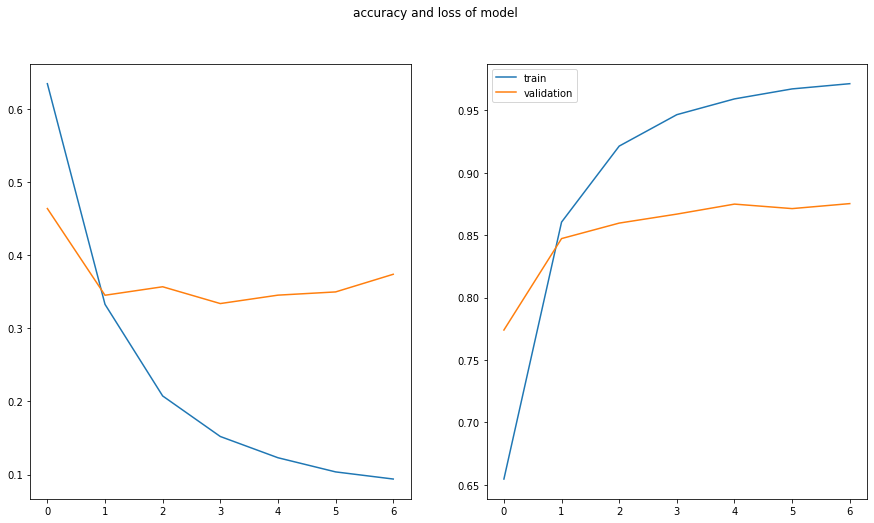

In [ ]:
plot_loss(history3)

# **Q5** (LSTM)

In [ ]:
model4 = Sequential()
model4.add(Embedding(num_words,32,input_length =len(X_train[0])))
model4.add(LSTM(16,input_shape = (num_words,maxlen), return_sequences=False,activation="relu"))
model4.add(Dense(1)) 
model4.add(Activation("sigmoid")) 
print(model4.summary())
model4.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 323,153
Trainable params: 323,153
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history4 = model4.fit(X_train,train_labels, validation_split = 0.1 ,epochs =20 ,batch_size=128, callbacks=[callback1, callback2, callback3])

Epoch 1/20
176/176 [==============================] - 34s 170ms/step - loss: 13.2636 - accuracy: 0.6811 - val_loss: 0.5023 - val_accuracy: 0.7904 - lr: 0.0010
Epoch 2/20
176/176 [==============================] - 27s 156ms/step - loss: 6.6295 - accuracy: 0.7776 - val_loss: 0.5444 - val_accuracy: 0.7712 - lr: 0.0010
Epoch 3/20
176/176 [==============================] - 27s 155ms/step - loss: 0.5249 - accuracy: 0.8161 - val_loss: 0.5314 - val_accuracy: 0.7676 - lr: 6.0653e-04
Epoch 4/20
176/176 [==============================] - 27s 156ms/step - loss: 0.4925 - accuracy: 0.8201 - val_loss: 0.5158 - val_accuracy: 0.7748 - lr: 3.6788e-04


In [ ]:
score = model4.evaluate(X_test,test_labels)

782/782 [==============================] - 11s 14ms/step - loss: 0.5141 - accuracy: 0.7812


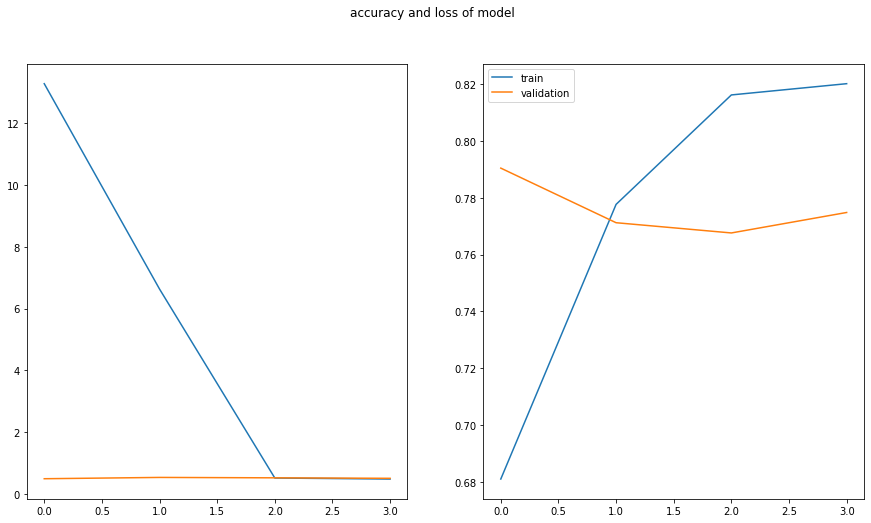

In [ ]:
plot_loss(history4)

# **Q6** (bidirectional lstm)

In [ ]:
model5 = Sequential()
model5.add(Embedding(num_words,128,input_length =len(X_train[0])))
model5.add(Bidirectional(LSTM(64,input_shape = (num_words,maxlen), return_sequences=False,activation="relu")))
model5.add(Dense(1)) 
model5.add(Activation("sigmoid")) 

print(model5.summary())
model5.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 200, 128)          2560000   
                                                                 
 bidirectional_16 (Bidirecti  (None, 128)              98816     
 onal)                                                           
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
 activation_4 (Activation)   (None, 1)                 0         
                                                                 
Total params: 2,658,945
Trainable params: 2,658,945
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history5 = model5.fit(X_train,train_labels, validation_split = 0.1 ,epochs =20 ,batch_size=128, callbacks=[callback1, callback2, callback3])

Epoch 1/20
176/176 [==============================] - 121s 675ms/step - loss: 142426014482432.0000 - accuracy: 0.6632 - val_loss: 0.6692 - val_accuracy: 0.7292 - lr: 0.0010
Epoch 2/20
176/176 [==============================] - 117s 662ms/step - loss: 0.6568 - accuracy: 0.7731 - val_loss: 0.6560 - val_accuracy: 0.7356 - lr: 0.0010
Epoch 3/20
176/176 [==============================] - 117s 663ms/step - loss: 0.6360 - accuracy: 0.8064 - val_loss: 0.6454 - val_accuracy: 0.7388 - lr: 6.0653e-04
Epoch 4/20
176/176 [==============================] - 117s 665ms/step - loss: 0.6199 - accuracy: 0.8203 - val_loss: 0.6382 - val_accuracy: 0.7380 - lr: 3.6788e-04
Epoch 5/20
176/176 [==============================] - 117s 664ms/step - loss: 0.6090 - accuracy: 0.8272 - val_loss: 0.6337 - val_accuracy: 0.7376 - lr: 2.2313e-04
Epoch 6/20
176/176 [==============================] - 117s 665ms/step - loss: 0.6020 - accuracy: 0.8308 - val_loss: 0.6310 - val_accuracy: 0.7380 - lr: 1.3534e-04
Epoch 7/20
176/1

In [ ]:
score = model5.evaluate(X_test,test_labels)

782/782 [==============================] - 39s 49ms/step - loss: 0.6336 - accuracy: 0.7181


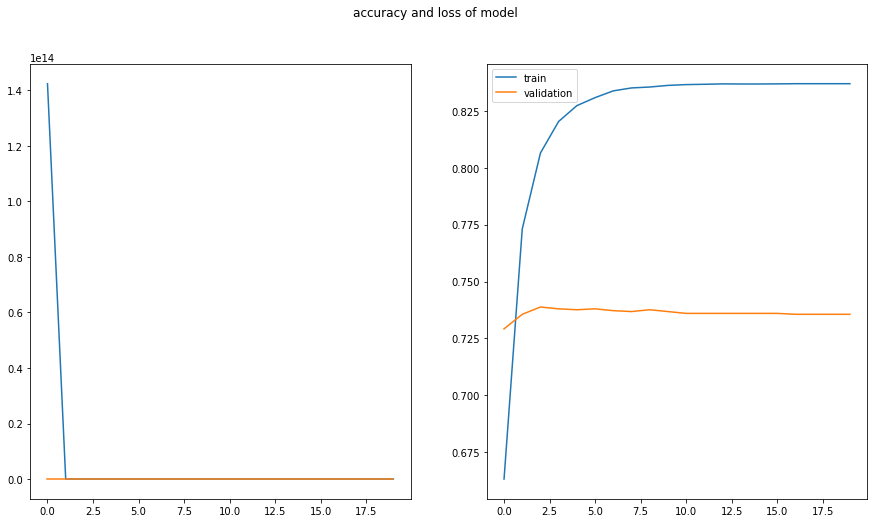

In [ ]:
plot_loss(history5)

# **Q7** (functional bidirectional lstm)

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int32")
x = Embedding(num_words, 128)(inputs)
x = Bidirectional(LSTM(64, return_sequences=False))(x)
#x = Bidirectional(LSTM(64))(x)
outputs = Dense(1, activation="sigmoid")(x)
model6 = keras.Model(inputs, outputs)
model6.summary()
model6.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history6 = model6.fit(X_train,train_labels, validation_split = 0.1 ,epochs =20 ,batch_size=128, callbacks=[callback1, callback2, callback3])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
176/176 [==============================] - 13s 38ms/step - loss: 0.4387 - accuracy: 0.7810 - val_loss: 0.3

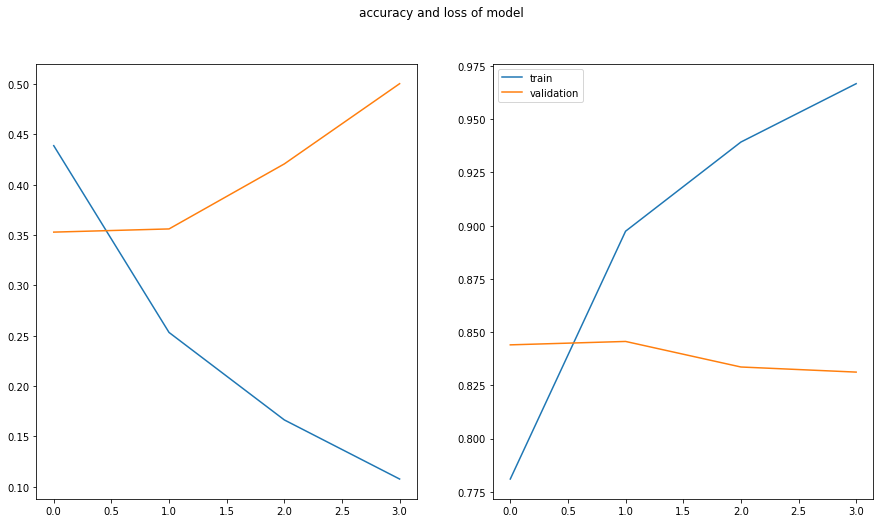

In [ ]:
plot_loss(history6)

In [ ]:
score = model6.evaluate(X_test,test_labels)

782/782 [==============================] - 4s 6ms/step - loss: 0.4738 - accuracy: 0.8386
